In [ ]:
!pip install icoscp --quiet
!pip install ipygee --quiet

# python lib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tqdm import tqdm

# Import module:
import sys

# Set path to ICOS tools:
sys.path.insert(0,'/data/project/pytools')

# Import ICOS tools:
from icoscp.sparql import sparqls
#from icoscp.cpb.cpbinfile import CpBinFile 
from icoscp.cpb.dobj import Dobj # @Alex ?
from icoscp.sparql.runsparql import RunSparql
from icoscp.station import station

import ee
from ipygee import *
import seaborn as sns
sns.set_style("ticks")
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

import numpy as np 
from numpy import ma

ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=nd0OGxf2v91L4KX3B3C1PZIw5gle-sV_ZviKlFR6S3E&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4Dk3fqgdGQGvB_CTayZiuGP3qTHdY9Mu5zenLu0HZlm5LhTpKv4HM

Successfully saved authorization token.


In [ ]:
stations = station.getIdList()
stations_AS = stations[stations['theme'] == 'AS']

list_CO_station = []
list_CO2_station = []
list_CH4_station = []

# boolean for avoiding many time 
get_station_releases = False
if get_station_releases:
    for index, row in stations_AS.iterrows():
        myStation = station.get(row['id'])
        
        if 'ICOS ATC CH4 Release' in myStation.products().values:
            list_CH4_station.append(row['id'])
            
        if 'ICOS ATC CO2 Release' in myStation.products().values:
            list_CO2_station.append(row['id'])
            
        if 'ICOS ATC CO Release' in myStation.products().values:
            list_CO_station.append(row['id'])
            
    print(list_CH4_station)
    print(list_CO2_station)
    print(list_CO_station)

# Note - every station in the list stations_AS have the 3 species
# list_station = ['GAT', 'HPB', 'HTM', 'SMR', 'IPR', 'JFJ', 'KIT', 'KRE', 'RUN', 'LMP', 'LIN', 'LUT', 'CMN', 'NOR', 'OPE', 'OXK', 'PAL', 'PUY', 'SAC', 'STE', 'SVB', 'TOH', 'TRN', 'UTO', 'ZEP']
#list_station = ['HPB', 'HTM', 'SMR', 'IPR', 'JFJ', 'RUN', 'LIN', 'LUT', 'CMN', 'PUY', 'SAC', 'TRN']
list_station = ['GAT','IPR','JFJ','KIT','KRE','RUN','LIN','CMN','OPE','PUY','SAC','TRN']
list_CO_station = list_station
list_CO2_station = list_station
list_CH4_station = list_station

In [ ]:
collection_CO = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_CO')\
                     .select('CO_column_number_density')
init_date_CO = '2018-11-22'
end_date_CO = '2021-02-28'

collection_CH4 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4')\
                     .select('CH4_column_volume_mixing_ratio_dry_air')
init_date_CH4 = '2019-02-08'
end_date_CH4 = '2021-02-27'

collection_CO2 = ee.ImageCollection('users/alejandrodiaz/jpl-oco2')\
                     .select('b1')
init_date_CO2 = '2015-01-01'
end_date_CO2 = '2021-01-01'

In [ ]:
#TODO: Change the species
mySpecLabel = 'ICOS ATC CO2 Release' # 'CH4/CO/CO2'
specie = 'co2' # 'ch4/co/co2'

GAT - Corr: 0.8165671150164477
    - Months: 45
    - %NaN-Sat: 57.8
    - %NaN-ICOS: 2.2

IPR - Corr: 0.8385606111602868
    - Months: 27
    - %NaN-Sat: 37.0
    - %NaN-ICOS: 0.0

JFJ - Corr: 0.4163852347598755
    - Months: 39
    - %NaN-Sat: 53.8
    - %NaN-ICOS: 0.0

KIT - Corr: 0.6756989285588926
    - Months: 40
    - %NaN-Sat: 35.0
    - %NaN-ICOS: 0.0

KRE - Corr: 0.6458435525559079
    - Months: 37
    - %NaN-Sat: 54.1
    - %NaN-ICOS: 8.1

RUN - Corr: 0.7883539416282869
    - Months: 24
    - %NaN-Sat: 16.7
    - %NaN-ICOS: 0.0

LIN - Corr: 0.8191071851470454
    - Months: 49
    - %NaN-Sat: 65.3
    - %NaN-ICOS: 0.0

CMN - Corr: 0.9042525728237634
    - Months: 22
    - %NaN-Sat: 40.9
    - %NaN-ICOS: 0.0

OPE - Corr: 0.7816217911243079
    - Months: 45
    - %NaN-Sat: 66.7
    - %NaN-ICOS: 0.0

PUY - Corr: 0.7935060077095588
    - Months: 45
    - %NaN-Sat: 48.9
    - %NaN-ICOS: 0.0

SAC - Corr: 0.7604356990660626
    - Months: 35
    - %NaN-Sat: 54.3
    - %NaN-ICOS: 0.0


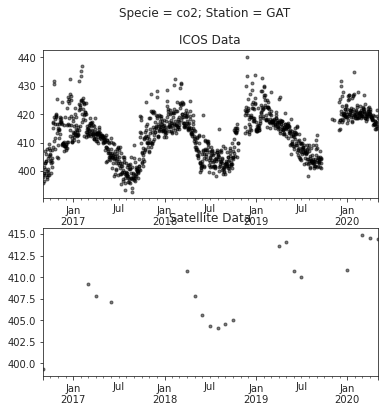

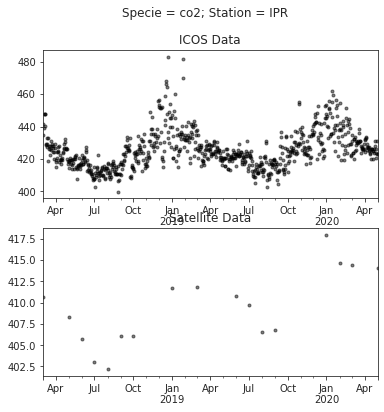

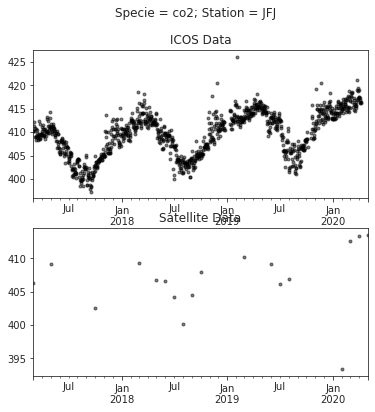

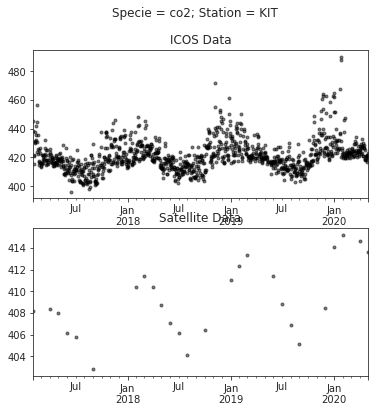

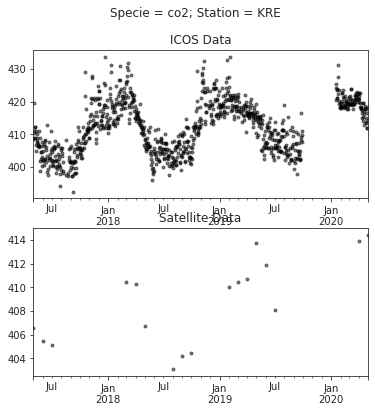

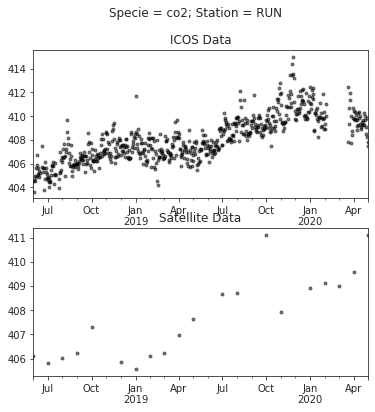

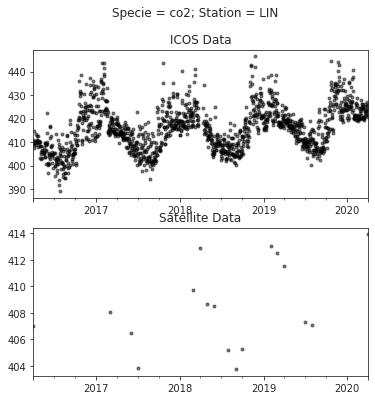

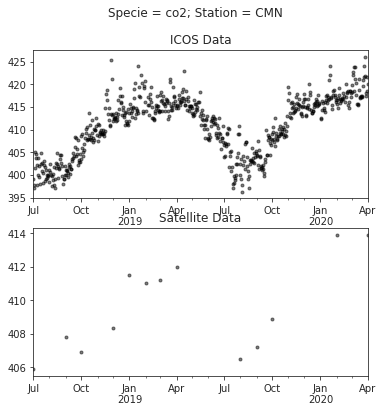

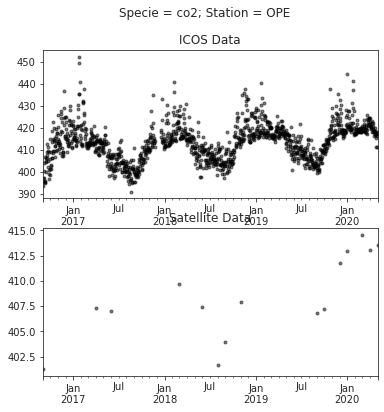

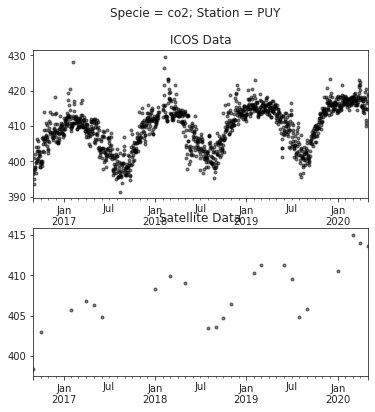

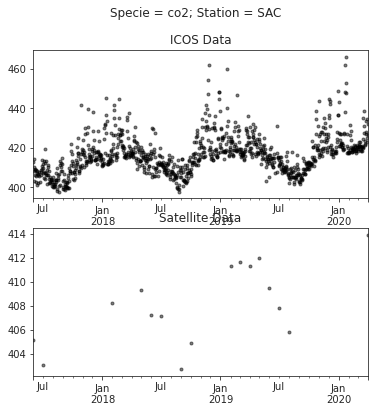

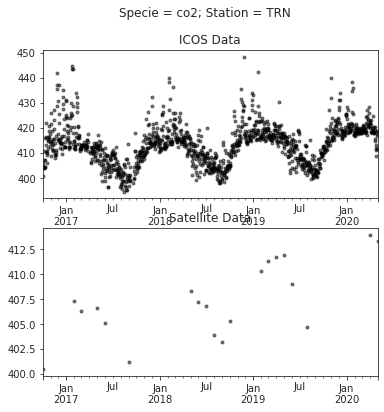

In [ ]:
np_SAT_list = []
np_ICOS_list = []
df_results = pd.DataFrame(columns=['correlation','months','per_nan_sat','per_nan_icos'], index=list_station)

for myStation_key in list_station:
    try:
        myStation = station.get(myStation_key)
        
        level2Data = myStation.data(level=2)
        level2Data_spec = level2Data[level2Data['specLabel'] == mySpecLabel]
        pid = level2Data_spec.loc[pd.to_numeric(level2Data_spec['samplingheight']).idxmax(), 'dobj']

        f = Dobj(pid)
        data_ICOS_full = f.getColumns()

        init_date_ICOS = str(data_ICOS_full['TIMESTAMP'].min())[0:10]
        end_date_ICOS = str(data_ICOS_full['TIMESTAMP'].max())[0:10]

        lat = myStation.info()['lat']
        lon = myStation.info()['lon']

        station_site = ee.Geometry.Point([lon, lat])
        station_feat = ee.Feature(station_site, {'name': 'station feature', 'buffer':0})

        station_featcol = ee.FeatureCollection([
            station_feat,
        ])

        # Filtering the dates 
        init_date = max(init_date_ICOS, eval("init_date_" + specie.upper()))
        end_date = min(end_date_ICOS, eval("end_date_" + specie.upper()))

        # Get ICOS data filtered by date
        data_ICOS = data_ICOS_full[(data_ICOS_full['TIMESTAMP'] > init_date) & (data_ICOS_full['TIMESTAMP'] < end_date)]

        # Get SAT data filtered by date
        #TODO: Automate 
        collection = eval("collection_" + specie.upper())\
                        .filterDate(ee.Date(init_date), ee.Date(end_date))\
                        .filterBounds(station_site)

        data_SAT = collection

        time_series = data_SAT
        chart_ts = chart.Image.series(**{
            'imageCollection': time_series, 
            'region': station_site,
            'scale': 10,
        })
        ts_SAT = chart_ts.dataframe

        ts_ICOS = data_ICOS.set_index('TIMESTAMP')[specie]
        ts_SAT = chart_ts.dataframe.squeeze()

        ts_ICOS_daily = ts_ICOS.resample('D').mean()
        ts_SAT_daily = ts_SAT.resample('D').mean()
        ts_ICOS_monthly = ts_ICOS.resample('M').mean()
        ts_SAT_monthly = ts_SAT.resample('M').mean()

        ts_index_daily = ts_SAT_daily.index.intersection(ts_ICOS_daily.index)
        ts_index_monthly = ts_SAT_monthly.index.intersection(ts_ICOS_monthly.index)

        ts_ICOS_daily = ts_ICOS_daily.get(ts_index_daily)
        ts_SAT_daily = ts_SAT_daily.get(ts_index_daily)
        ts_ICOS_monthly = ts_ICOS_monthly.get(ts_index_monthly)
        ts_SAT_monthly = ts_SAT_monthly.get(ts_index_monthly)

        fig, (ax1, ax2) = plt.subplots(2)
        fig.suptitle('Specie = ' + specie + '; Station = ' + myStation_key)
        ax1.set_title('ICOS Data')
        ax2.set_title('Satellite Data')
        ts_ICOS_daily.plot(marker='.', alpha=0.5, color='k', linestyle='None', ax=ax1)
        ts_SAT_daily.plot(marker='.', alpha=0.5, color='k', linestyle='None', ax=ax2)

        np_SAT_monthly = ts_SAT_monthly.values
        np_ICOS_monthly = ts_ICOS_monthly.values

        print(myStation_key + " - Corr: " + str(ma.corrcoef(ma.masked_invalid(np_SAT_monthly), ma.masked_invalid(np_ICOS_monthly)).data[1,0]))
        print("    - Months: " + str(len(ts_SAT_monthly)))
        print("    - %NaN-Sat: " + str(round(ts_SAT_monthly.isna().sum()/len(ts_SAT_monthly)*100,1)))
        print("    - %NaN-ICOS: " + str(round(ts_ICOS_monthly.isna().sum()/len(ts_ICOS_monthly)*100,1)) + "\n")
        df_results.loc[myStation_key] = pd.Series({'correlation': round(ma.corrcoef(ma.masked_invalid(np_SAT_monthly), ma.masked_invalid(np_ICOS_monthly)).data[1,0],4),\
                                            'months': len(ts_SAT_monthly),\
                                            'per_nan_sat': round(ts_SAT_monthly.isna().sum()/len(ts_SAT_monthly)*100,1),\
                                            'per_nan_icos': round(ts_ICOS_monthly.isna().sum()/len(ts_ICOS_monthly)*100,1)\
                                        })
        # df_results.loc[myStation_key] = pd.Series({'correlation': round(ma.corrcoef(ma.masked_invalid(np_SAT_daily), ma.masked_invalid(np_ICOS_daily)).data[1,0],4),\
        #                             'months': len(ts_SAT_daily),\
        #                             'per_nan_sat': round(ts_SAT_daily.isna().sum()/len(ts_SAT_daily)*100,1),\
        #                             'per_nan_icos': round(ts_ICOS_daily.isna().sum()/len(ts_ICOS_daily)*100,1)\
        #                         })

        np_SAT_list = np.concatenate((np_SAT_list, np_SAT_monthly))
        np_ICOS_list = np.concatenate((np_ICOS_list, np_ICOS_monthly))
    except:
        print(myStation_key + " - Corr: Time exceded or no data \n")

print("Corr total: " + str(ma.corrcoef(ma.masked_invalid(np_SAT_list), ma.masked_invalid(np_ICOS_list))) + "\n")
df_results.to_excel("result_" + specie + ".xlsx")  

In [ ]:
print(df_results.to_latex(index=True))

\begin{tabular}{lllll}
\toprule
{} & correlation & months & per\_nan\_sat & per\_nan\_icos \\
\midrule
GAT &      0.8166 &     45 &        57.8 &          2.2 \\
IPR &      0.8386 &     27 &          37 &            0 \\
JFJ &      0.4164 &     39 &        53.8 &            0 \\
KIT &      0.6757 &     40 &          35 &            0 \\
KRE &      0.6458 &     37 &        54.1 &          8.1 \\
RUN &      0.7884 &     24 &        16.7 &            0 \\
LIN &      0.8191 &     49 &        65.3 &            0 \\
CMN &      0.9043 &     22 &        40.9 &            0 \\
OPE &      0.7816 &     45 &        66.7 &            0 \\
PUY &      0.7935 &     45 &        48.9 &            0 \\
SAC &      0.7604 &     35 &        54.3 &            0 \\
TRN &      0.7015 &     44 &        54.5 &            0 \\
\bottomrule
\end{tabular}



In [ ]:
df_results['real_months'] = df_results['months']*(1 - df_results['per_nan_sat']/100)